C:\Users\lukeh\Downloads\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


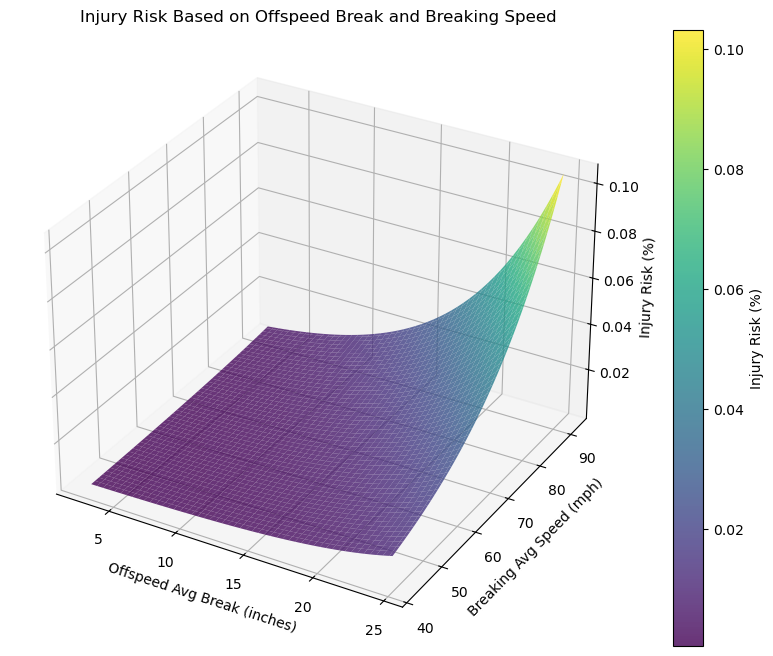

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = r"C:\Users\lukeh\Downloads\total_inj_df_1.csv"
data = pd.read_csv(file_path)

elbow_injuries = [
    "Tommy John surgery", "Elbow surgery (UCL)", "Elbow surgery",
    "Elbow surgery (internal brace)", "Elbow surgery (UCL revision)",
    "Arthroscopic elbow surgery", "Elbow surgery (UCL/flexor tendon repair)",
    "Elbow surgery (ulnar neuritis)"
]

data['injured?'] = data['Injury / Surgery'].apply(
    lambda x: 0 if pd.isna(x) or x.strip().lower() == 'na' else 1
)
data['elbow?'] = data['Injury / Surgery'].apply(
    lambda x: 1 if str(x).strip() in elbow_injuries else 0
)

data_cleaned = data.dropna(subset=['offspeed_avg_break', 'breaking_avg_speed', 'elbow?'])

X = data_cleaned[['offspeed_avg_break', 'breaking_avg_speed']]
y = data_cleaned['elbow?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

offspeed_range = np.linspace(X['offspeed_avg_break'].min(), X['offspeed_avg_break'].max(), 100)
breaking_speed_range = np.linspace(X['breaking_avg_speed'].min(), X['breaking_avg_speed'].max(), 100)

grid_offspeed, grid_breaking = np.meshgrid(offspeed_range, breaking_speed_range)
grid_points = np.c_[grid_offspeed.ravel(), grid_breaking.ravel()]
grid_points_scaled = scaler.transform(grid_points)

risk_probs = model.predict_proba(grid_points_scaled)[:, 1].reshape(grid_offspeed.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_offspeed, grid_breaking, risk_probs, cmap='viridis', alpha=0.8)

ax.set_title("Injury Risk Based on Offspeed Break and Breaking Speed")
ax.set_xlabel("Offspeed Avg Break (inches)")
ax.set_ylabel("Breaking Avg Speed (mph)")
ax.set_zlabel("Injury Risk (%)")
plt.colorbar(surf, label="Injury Risk (%)")

plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

file_path = r"C:\Users\lukeh\Downloads\total_inj_df_1.csv"
data = pd.read_csv(file_path)

elbow_injuries = [
    "Tommy John surgery", "Elbow surgery (UCL)", "Elbow surgery",
    "Elbow surgery (internal brace)", "Elbow surgery (UCL revision)",
    "Arthroscopic elbow surgery", "Elbow surgery (UCL/flexor tendon repair)",
    "Elbow surgery (ulnar neuritis)"
]

data['injured?'] = data['Injury / Surgery'].apply(
    lambda x: 0 if pd.isna(x) or x.strip().lower() == 'na' else 1
)
data['elbow?'] = data['Injury / Surgery'].apply(
    lambda x: 1 if str(x).strip() in elbow_injuries else 0
)

data_cleaned = data.dropna(subset=['offspeed_avg_break', 'breaking_avg_speed', 'elbow?'])

X = data_cleaned[['offspeed_avg_break', 'breaking_avg_speed']]
y = data_cleaned['elbow?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

offspeed_range = np.linspace(X['offspeed_avg_break'].min(), X['offspeed_avg_break'].max(), 100)
breaking_speed_range = np.linspace(X['breaking_avg_speed'].min(), X['breaking_avg_speed'].max(), 100)

grid_offspeed, grid_breaking = np.meshgrid(offspeed_range, breaking_speed_range)
grid_points = np.c_[grid_offspeed.ravel(), grid_breaking.ravel()]
grid_points_scaled = scaler.transform(grid_points)

risk_probs = model.predict_proba(grid_points_scaled)[:, 1].reshape(grid_offspeed.shape)

fig = go.Figure()

fig.add_trace(go.Surface(
    z=risk_probs,
    x=grid_offspeed,
    y=grid_breaking,
    colorscale='Viridis',
    colorbar=dict(title="Injury Risk (%)"),
))

fig.update_layout(
    title="Injury Risk Based on Offspeed Break and Breaking Speed",
    scene=dict(
        xaxis_title="Offspeed Avg Break (inches)",
        yaxis_title="Breaking Avg Speed (mph)",
        zaxis_title="Injury Risk (%)",
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.write_html("injury_risk_visualization.html")

print("HTML file saved as injury_risk_visualization.html. You can open this file in a web browser.")



C:\Users\lukeh\Downloads\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


HTML file saved as injury_risk_visualization.html. You can open this file in a web browser.
